In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('pulsar_stars_new.csv')
df_new_1=df[(df['MIP']>=83) & (df['MIP']<=84)& (df['TARGET']==0)]
df_new_2=df[(df['MIP']>=83) & (df['MIP']<=89) & (df['TARGET']==1)]
df_new = df_new_1._append(df_new_2)
df_new.shape[0]

136

In [345]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_names = df_new.columns.tolist()
df_1 = scaler.fit_transform(df_new.copy())
df_normalized=pd.DataFrame(df_1,columns=columns_names)
df_normalized = df_normalized.drop('TARGET',axis=1)
df_normalized.describe()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,0.265956,0.332807,0.275692,0.207790,0.133338,0.300953,0.306509,0.126440
std,0.276403,0.183426,0.178069,0.132406,0.233797,0.267329,0.202268,0.165433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060884,0.196631,0.136301,0.130436,0.010442,0.079572,0.150053,0.014475
50%,0.148299,0.294784,0.232713,0.171814,0.030479,0.199868,0.277947,0.060598
75%,0.419728,0.466151,0.404739,0.257689,0.119816,0.466557,0.450342,0.187505
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [346]:
from sklearn.linear_model import LogisticRegression

y=df_new['TARGET']
logreg = LogisticRegression(random_state=2019, solver='lbfgs')
logreg.fit(df_normalized, y)
logreg.predict_proba([[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]])

C:\Users\makar\OneDrive\Рабочий стол\ML-ITMO-openedu\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.72645056, 0.27354944]])

In [347]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(p=1)
neighbors.fit(df_normalized, y)
neighbors.predict_proba([[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]])

C:\Users\makar\OneDrive\Рабочий стол\ML-ITMO-openedu\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])

In [348]:

from keras.datasets import mnist
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
(X_train, y_train), (X_test, y_test)= mnist.load_data()
dim = 784
X_train = X_train.reshape(len(X_train), dim)

In [349]:
pca = PCA(n_components=70, svd_solver='full')
pca.fit(X_train)
disp = np.round(np.cumsum(pca.explained_variance_ratio_),3)

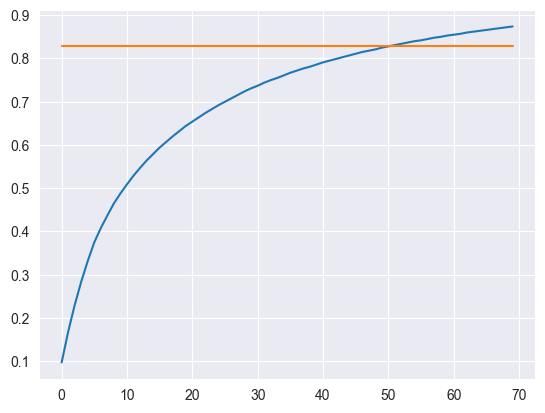

{0: 0.097, 1: 0.168, 2: 0.23, 3: 0.284, 4: 0.332, 5: 0.375, 6: 0.408, 7: 0.437, 8: 0.465, 9: 0.488, 10: 0.509, 11: 0.529, 12: 0.547, 13: 0.564, 14: 0.579, 15: 0.594, 16: 0.607, 17: 0.62, 18: 0.632, 19: 0.644, 20: 0.654, 21: 0.664, 22: 0.674, 23: 0.683, 24: 0.692, 25: 0.7, 26: 0.708, 27: 0.716, 28: 0.724, 29: 0.731, 30: 0.737, 31: 0.744, 32: 0.75, 33: 0.755, 34: 0.761, 35: 0.767, 36: 0.772, 37: 0.777, 38: 0.781, 39: 0.786, 40: 0.791, 41: 0.795, 42: 0.799, 43: 0.803, 44: 0.807, 45: 0.811, 46: 0.815, 47: 0.818, 48: 0.821, 49: 0.825, 50: 0.828, 51: 0.831, 52: 0.834, 53: 0.837, 54: 0.84, 55: 0.842, 56: 0.845, 57: 0.848, 58: 0.85, 59: 0.853, 60: 0.855, 61: 0.857, 62: 0.86, 63: 0.862, 64: 0.864, 65: 0.866, 66: 0.868, 67: 0.87, 68: 0.872, 69: 0.874}


In [350]:

plt.plot(disp)
plt.plot(np.linspace(0.83,0.83,70))
plt.show()
res={}
for i in range(70):
    res[i]=float(disp[i])
print(res)

In [351]:
pca=PCA(n_components=52, svd_solver='full')
X_transformed=pca.fit_transform(X_train)
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y_train, test_size=0.3, random_state=126)
pd.DataFrame(X_train)[0].mean()


np.float64(0.5965431171659991)

In [352]:
rfc = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=126)
clf = OneVsRestClassifier(rfc).fit(X_train, y_train)

y_pred = clf.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
P = 5
print(f'Число верно определенных классов {P}: {CM[P][P]}')

Число верно определенных классов 5: 1412


In [353]:
data = pd.read_csv('pred_for_task (2).csv',index_col='FileName')
data

,Label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f774,f775,f776,f777,f778,f779,f780,f781,f782,f783
FileName,,,,,,,,,,,,,,,,,,,,,
file1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file9,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [354]:

X_test = data.drop(['Label','FileName'], axis=1)
X_test

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f774,f775,f776,f777,f778,f779,f780,f781,f782,f783
FileName,,,,,,,,,,,,,,,,,,,,,
file1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
file9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [367]:
t=X_test.copy()
X_test_1 = pca.transform(t)
y_test_1 = data['Label']
y_pred = clf.predict(X_test_1)
print(f'вероятность: {clf.predict_proba([X_test_1[19]])[0][4]}')

вероятность: 0.8654040723958417


C:\Users\makar\OneDrive\Рабочий стол\ML-ITMO-openedu\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
